In [22]:
import glob
import os
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
from PIL import Image


In [23]:
import utils

In [24]:
df = pd.read_csv('/Users/user/repos/zoobot-3d/data/gz3d_and_gz_desi_matches.csv')

In [25]:
df

,ra_subject,dec_subject,mangaid,iauname,ifudesignsize,manga_tileid,nsa_id,explorer_link,gz_total_classifications,gz_bar_votes,...,sample,best_match,sky_separation,ra,dec,brickid,objid,mag_r,mag_g,mag_z
0,119.633810,52.597965,1-379196,J075832.13+523552.8,127.0,6052.0,401171,http://skyserver.sdss.org/dr13/en/tools/chart/...,0,0,...,NaN,7137390,1.111308,119.634277,52.598086,593252,2670,17.463337,18.047440,17.178480
1,123.172966,40.414574,1-122586,J081241.50+402452.4,19.0,6080.0,129826,http://skyserver.sdss.org/dr13/en/tools/chart/...,83,14,...,"sdss_lost_set,original",6349712,0.045290,123.172952,40.414567,545573,493,15.721684,16.760733,14.982753
2,130.662580,22.271725,1-413080,J084239.01+221618.3,37.0,6630.0,436909,http://skyserver.sdss.org/dr13/en/tools/chart/...,44,5,...,original,4707176,0.094151,130.662552,22.271728,456006,2713,14.528112,15.330119,13.920923
3,41.068295,0.341599,1-37002,J024416.39+002029.7,127.0,7712.0,39428,http://skyserver.sdss.org/dr13/en/tools/chart/...,106,0,...,"stripe82,stripe82",2346568,0.089848,41.068310,0.341579,331972,6476,16.086176,16.849205,15.541221
4,141.138980,18.005377,1-472134,J092433.35+180019.3,37.0,6599.0,499434,http://skyserver.sdss.org/dr13/en/tools/chart/...,40,7,...,original,4267811,0.069380,141.138963,18.005366,433021,2462,14.318173,15.184296,13.653379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29000,223.061890,1.923668,1-70182,J145214.85+015525.1,37.0,7209.0,74385,http://skyserver.sdss.org/dr13/en/tools/chart/...,26,9,...,original,2562538,0.032993,223.061897,1.923662,342780,1014,15.220949,15.900329,14.696295
29001,220.557370,8.676692,1-631080,J144213.49+084037.9,37.0,7205.0,682826,http://skyserver.sdss.org/dr13/en/tools/chart/...,38,37,...,original,3295267,0.066732,220.557384,8.676679,381490,926,14.336598,15.200209,13.656709
29002,134.990800,47.668700,1-123603,J085957.79+474007.3,37.0,6104.0,130907,http://skyserver.sdss.org/dr13/en/tools/chart/...,84,2,...,"sdss_lost_set,original",6845770,0.070001,134.990802,47.668719,575678,466,16.619099,17.453117,15.984756
29003,243.424910,13.028250,1-499517,J161341.97+130141.6,61.0,7559.0,528197,http://skyserver.sdss.org/dr13/en/tools/chart/...,46,3,...,original,3744822,0.224648,243.424856,13.028217,405637,3166,15.685409,16.439041,15.119692


In [26]:
df = df[:100]

In [27]:
df[['brickid', 'objid']]

,brickid,objid
0,593252,2670
1,545573,493
2,456006,2713
3,331972,6476
4,433021,2462
...,...,...
95,487547,3071
96,389620,5718
97,511138,3029
98,483712,1311


In [28]:
#  '/share/nas2/walml/galaxy_zoo/decals/dr8/fits/'
df['galahad_fits_loc'] = df['brickid'].astype(str) + '/' + df['brickid'].astype(str) + '_' + df['objid'].astype(str) + '.fits'
df['galahad_fits_loc'][0]

/var/folders/v_/07z2h1qd2v9_0q6nymwp4fwc0000gp/T/ipykernel_48504/535611612.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['galahad_fits_loc'] = df['brickid'].astype(str) + '/' + df['brickid'].astype(str) + '_' + df['objid'].astype(str) + '.fits'


'593252/593252_2670.fits'

In [29]:
with open('data/galahad_fits_to_copy.txt', 'w') as f:
    f.write('\n'.join(df['galahad_fits_loc']))

In [30]:
# rsync --files-from data/galahad_fits_to_copy.txt -e 'ssh -A -J walml@external.jb.man.ac.uk' walml@galahad.ast.man.ac.uk:/share/nas2/walml/galaxy_zoo/decals/dr8/fits data/gz_desi/fits

In [31]:
df['local_desi_fits_loc'] = 'data/gz_desi/fits/' + df['brickid'].astype(str) + '/' + df['brickid'].astype(str) + '_' + df['objid'].astype(str) + '.fits'

/var/folders/v_/07z2h1qd2v9_0q6nymwp4fwc0000gp/T/ipykernel_48504/1765373976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['local_desi_fits_loc'] = 'data/gz_desi/fits/' + df['brickid'].astype(str) + '/' + df['brickid'].astype(str) + '_' + df['objid'].astype(str) + '.fits'


In [32]:
local_gz3d_locs = glob.glob('data/gz3d/fits_gz/*.fits.gz')
temp = pd.DataFrame(data=local_gz3d_locs, columns=['local_gz3d_fits_loc'])
temp['mangaid'] = temp['local_gz3d_fits_loc'].apply(lambda x: os.path.basename(x).split('_')[1])

df = pd.merge(df, temp, on='mangaid', how='left')
# TODO can remove this soon


In [33]:
df.to_csv('data/gz3d_and_gz_desi_master_catalog.csv', index=False)

In [34]:
galaxy = df.iloc[32]
# galaxy = df.iloc[33]

In [35]:
galaxy['explorer_link']

'http://skyserver.sdss.org/dr13/en/tools/chart/navi.aspx?ra=165.2972&dec=12.4748'

In [36]:
galaxy

ra_subject                                                          165.29715
dec_subject                                                         12.474752
mangaid                                                              1-304336
iauname                                                   J110111.31+122829.1
ifudesignsize                                                           127.0
manga_tileid                                                           6800.0
nsa_id                                                                 321982
explorer_link               http://skyserver.sdss.org/dr13/en/tools/chart/...
gz_total_classifications                                                   34
gz_bar_votes                                                               14
gz_spiral_votes                                                            13
sample                                                               original
best_match                                                      

In [37]:
im = fits.open(galaxy['local_desi_fits_loc'])[0].data
im = im.transpose(1, 2, 0)  # channels last

# def crop_in_third(img):
#     width = img.shape[0]//3
#     print(img.shape, width)
#     return crop_center(img, width, width)

# crop DESI to have GZ3D FoV
# 52 arcsec at 0.262 arcsec/pixel
# 52 / 0.262 = 198

def crop_center(img,cropx=198,cropy=198):
    y , x, _ = img.shape
    startx = x//2-(cropx//2)
    starty = y//2-(cropy//2)    
    return img[starty:starty+cropy,startx:startx+cropx]

im = crop_center(im)
im = im.transpose(2, 0, 1)  # channels first
# print(im)

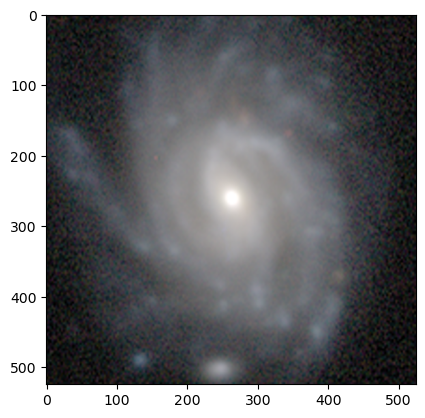

In [38]:

desi_im = utils.fits_to_png(im).transpose(Image.FLIP_TOP_BOTTOM).resize((525, 525))
plt.imshow(desi_im)
# im.min(), im.max()

"GZ:3D images were selected to have a pixel scale of 0.099 arcsec per pixel
and were generated to have a ﬁeld of view of 52 arcsec (525 × 525
pixels), selected to be twice the size of the largest MaNGA bundle
on the sky."

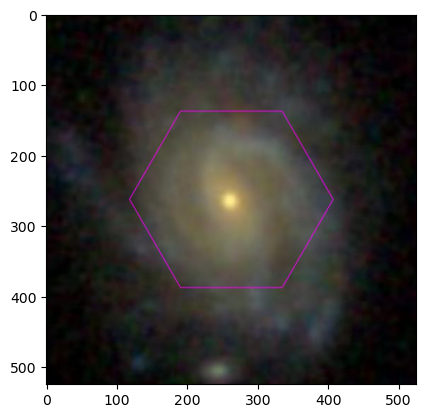

In [39]:
manga_im = fits.open(galaxy['local_gz3d_fits_loc'])[0].data
plt.imshow(manga_im)

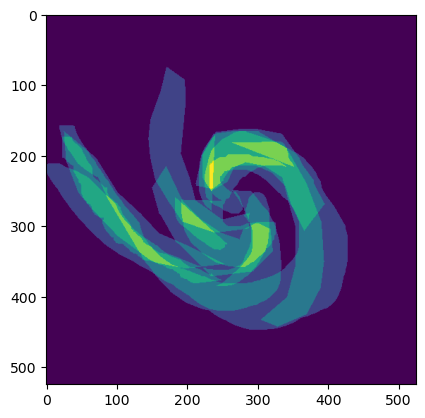

In [40]:
seg_im = fits.open(galaxy['local_gz3d_fits_loc'])[3].data
plt.imshow(seg_im)

In [41]:
seg_im.shape, desi_im.size

((525, 525), (525, 525))

(-0.5, 524.5, 524.5, -0.5)

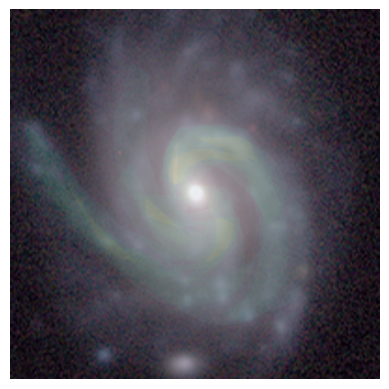

In [42]:
plt.imshow(desi_im)
plt.imshow(seg_im, alpha=.1)
plt.axis('off')

In [43]:
"""
The image stacks use a simple tangent-plane (WCS TAN) projection around the brick center.
The projections for the griz filters are identical, 
with a pixel scale of 0.262″/pix. 
"""

'\nThe image stacks use a simple tangent-plane (WCS TAN) projection around the brick center.\nThe projections for the griz filters are identical, \nwith a pixel scale of 0.262″/pix. \n'

In [44]:
# TODO need a flip